In [13]:
include("MDBM__types.jl")
using Plots
gr()

Plots.GRBackend()

In [19]:
ax1=Axis(-5:5.0,"x")
ax2=Axis(-7:1:7.0,"y")
ax3=Axis(-3:3.0,"z")

mdbmaxes=[ax1,ax2,ax3]

function f(x,y,z)
    [x*x+y*y+z*z-2.0*2.0]
end

function c(x,y,z)
    [x-sin(y)+1,z-x^3]
end

println.(([length(mdbmaxes[i].ticks) for i in 1:3]))
# @time mdbm=MDBM_Problem(f,mdbmaxes,constraint=c,memoization=false)
@time mdbm=MDBM_Problem(f,mdbmaxes,constraint=c)
@time interpolate!(mdbm,interpolationorder=1)
println(length(mdbm.ncubes))

11
15
7
  0.003235 seconds (18.35 k allocations: 1.172 MiB)
  0.056520 seconds (219.39 k allocations: 7.600 MiB)
58


  0.009899 seconds (33.30 k allocations: 2.714 MiB, 75.33% gc time)
  0.293843 seconds (1.57 M allocations: 52.689 MiB, 5.16% gc time)
81
113
49
2234


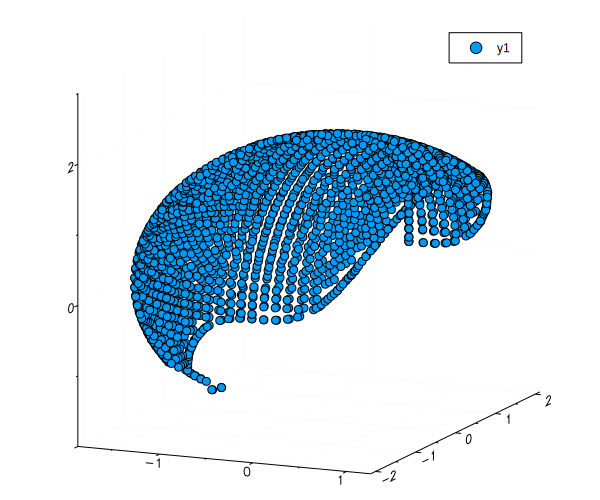

In [22]:
for kstep=1:1
@time refine!(mdbm)
@time interpolate!(mdbm,interpolationorder=1)
# println(length(mdbm.axes[1].ticks))
# println(length(mdbmaxes[1].ticks))
# println(length(ax1.ticks))
end
# # plotlyjs()
# # unicodeplots()
x,y,z=getinterpolatedpoint(mdbm)
println.(([length(mdbmaxes[i].ticks) for i in 1:3]))
println(length(x))
scatter(x,y,z,size = (600, 500))

In [2]:
include("MDBM__types.jl")
using Profile
using ProfileView

In [4]:
ax1=Axis(-5:5.0,"x")
ax2=Axis(-7:1:7.0,"y")

mdbmaxes=[ax1,ax2]

function f(x,y)
    [x*x+y*y-2.0*2.0]
end

function c(x,y)
    y+x
end
interporder=1;#0
 mdbm0=MDBM_Problem(f,mdbmaxes,constraint=c)

     refine!(mdbm0)
        interpolate!(mdbm0,interpolationorder=1)

In [6]:
#mdbm=MDBM_Problem(f,[Axis(-5:5.0,"x"),Axis(-7:1:7.0,"y")],constraint=c)
function runN!(mdbm,N)
    interpolate!(mdbm,interpolationorder=0)
    for kstep=1:N
        refine!(mdbm)
        interpolate!(mdbm,interpolationorder=0)
    end
end

runN! (generic function with 1 method)

In [8]:
Profile.clear()
for i in 1:10
    mdbm=MDBM_Problem(f,[Axis(-5:5.0,"x"),Axis(-7:1:7.0,"y")],constraint=c)
    runN!(mdbm,4)
end

In [11]:
Profile.clear()
@profile for i in 1:100
    mdbm=MDBM_Problem(f,[Axis(-5:5.0,"x"),Axis(-7:1:7.0,"y")],constraint=c)
    runN!(mdbm,4)
end

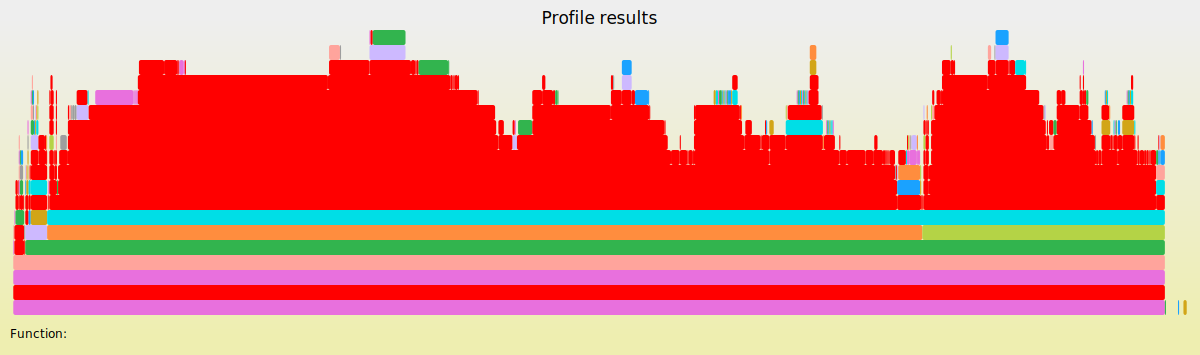

In [12]:
ProfileView.view()